In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
class Perceptron:
    #Apprentissage
    def fit(self, X, y, n_iter=100):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        #add1 for the bias term
        self.weights = np.zeros((n_features+1,))

        #add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)

        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j,:])<=0:
                    self.weights +=y[j]*X[j,:]

    #Prediction

    def predict(self, X):

        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return

        n_samples = X.shape[0]
        #Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1) 
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val>0 else -1)(y)
        return y

    #Evaluation (Scoring) et creation donnees

    def score(self, X, y):
        pred_y = self.predict(X)
        return np.mean(y == pred_y)

In [11]:
def draw(X_train,y_train,a,ax):
    ax.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)


    x0_1 = np.amin(X_train[:,0])
    x0_2 = np.amax(X_train[:,0])

    x1_1 = (-a.weights[2] - a.weights[0]* x0_1 ) / a.weights[1]
    x1_2 = (-a.weights[2] - a.weights[0]* x0_2 ) / a.weights[1]

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

    ymin = np.amin(X_train[:,1])
    ymax = np.amax(X_train[:,1])
    ax.set_ylim([ymin-3,ymax+3])

In [12]:
#creation des données
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=175, 
    class_sep=2
)

In [13]:
#Normaliser y (= 1 ou -1 au lieu de 1 ou 0)
y = np.vectorize(lambda val: 1 if val>0 else -1)(y)

a = Perceptron()
a.fit(X, y)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=175)

Perceptron classification accuracy 1.0


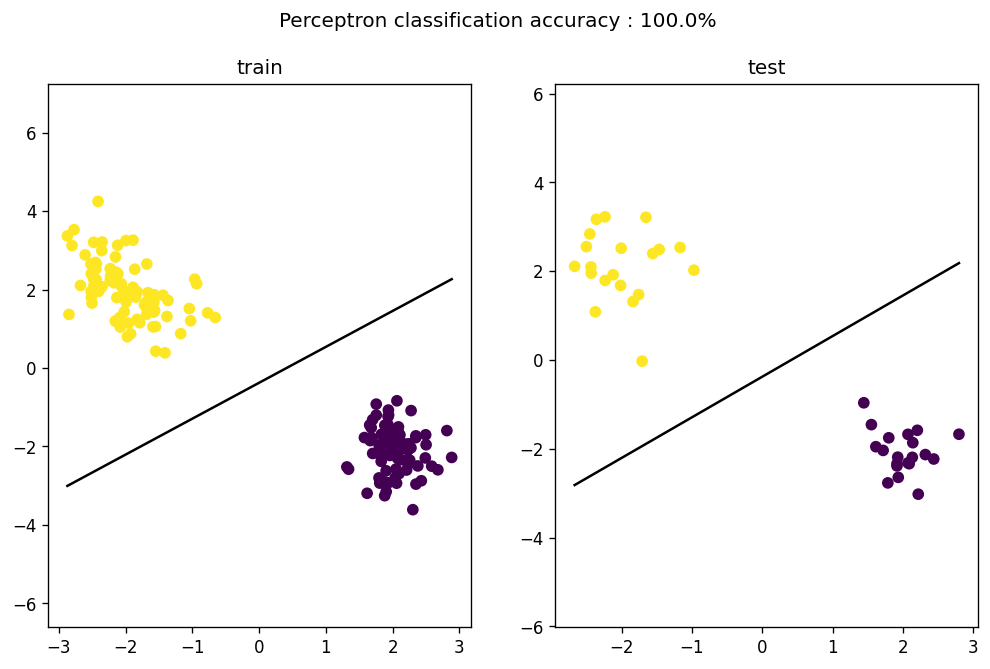

In [14]:
#configuration de plot
fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,6))
print("Perceptron classification accuracy", a.score(X, y))
ax_train.set_title('train')
ax_test.set_title('test')
plt.suptitle("Perceptron classification accuracy : "+str(a.score(X_test, y_test)*100)+"%")
draw(X_train,y_train,a,ax_train)
draw(X_test,y_test,a,ax_test)
plt.show()